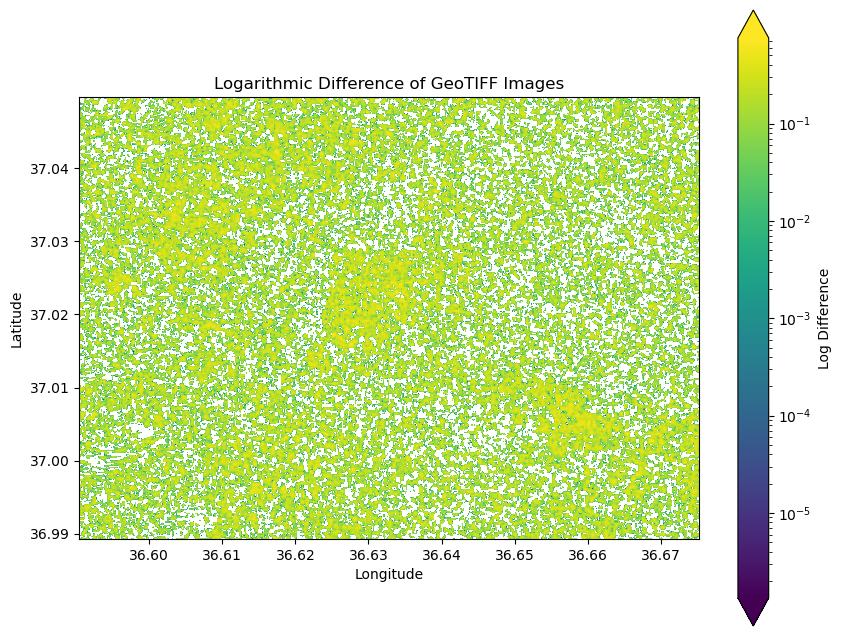

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to read GeoTIFF file
def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        affine = src.transform
    return data, affine

# Function to calculate the logarithmic difference
def calculate_log_difference(data1, data2):
    # Avoid division by zero and log of zero issues
    with np.errstate(divide='ignore', invalid='ignore'):
        log_diff = data1 - data2
        #log_diff[np.isinf(log_diff)] = np.nan  # Convert inf to nan
    return log_diff

# Load two GeoTIFF images
# data1, affine1 = read_geotiff('Feb_22.tif')
# data2, affine2 = read_geotiff('Jan_16.tif')



data1, affine1 = read_geotiff('CHANGE/S1A_20230128T153358__S1A_20230116T153333_20230116T153358_CARD-COH12_crop.tif')
data2, affine2 = read_geotiff('CHANGE/S1A_20230209T153357__S1A_20230128T153333_20230128T153358_CARD-COH12_crop.tif')

# Calculate logarithmic difference
log_diff = calculate_log_difference(data1, data2)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(log_diff, cmap='viridis', norm=LogNorm(), extent=[affine1[2], affine1[2] + affine1[0] * data1.shape[1], affine1[5] + affine1[4] * data1.shape[0], affine1[5]], origin='upper')
ax.set_title('Logarithmic Difference of GeoTIFF Images')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cbar = fig.colorbar(cax, ax=ax, extend='both')
cbar.set_label('Log Difference')
plt.show()


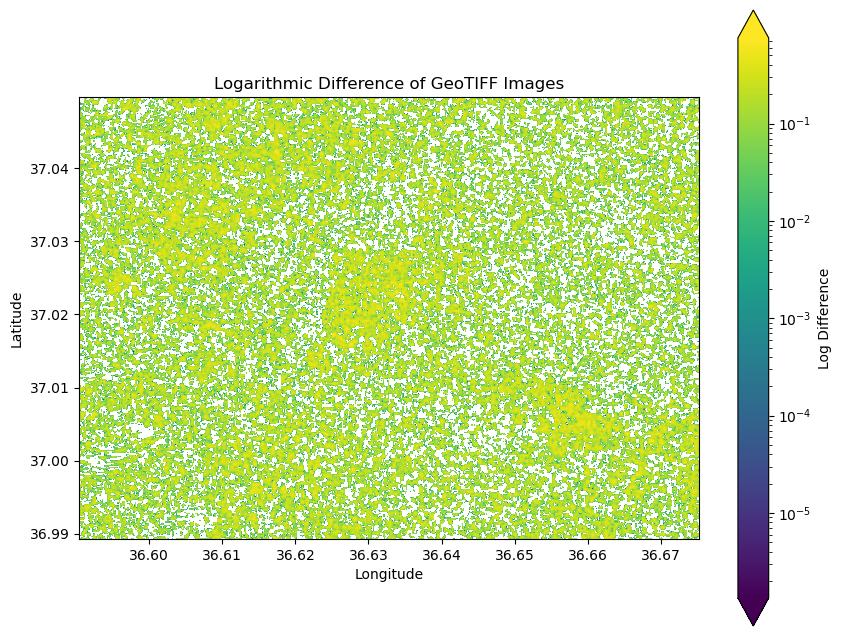

In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to read GeoTIFF file
def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        meta = src.meta  # Copy metadata
    return data, meta

# Function to calculate the logarithmic difference
def calculate_log_difference(data1, data2):
    # Avoid division by zero and log of zero issues
    with np.errstate(divide='ignore', invalid='ignore'):
        #log_diff = np.log(data1 / data2)
        log_diff = data1 - data2
        # log_diff[np.isinf(log_diff)] = np.nan  # Convert inf to nan
        # log_diff[np.isnan(log_diff)] = np.nan  # Optionally set NaNs to minimum
        #log_diff[np.isnan(log_diff)] = np.nanmin(log_diff)  # Optionally set NaNs to minimum
    return log_diff

# Load two GeoTIFF images
# data1, meta1 = read_geotiff('Jan_16.tif')
# data2, meta2 = read_geotiff('Feb_22.tif')

data1, meta1 = read_geotiff('CHANGE/S1A_20230128T153358__S1A_20230116T153333_20230116T153358_CARD-COH12_crop.tif')
data2, meta2 = read_geotiff('CHANGE/S1A_20230209T153357__S1A_20230128T153333_20230128T153358_CARD-COH12_crop.tif')




# Calculate logarithmic difference
log_diff = calculate_log_difference(data1, data2)

# Save the logarithmic difference as a new GeoTIFF file
output_path = 'log_difference.tif'
meta1.update(dtype=rasterio.float32, count=1, compress='lzw')
with rasterio.open(output_path, 'w', **meta1) as dst:
    dst.write(log_diff.astype(rasterio.float32), 1)

# Plotting
# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(log_diff, cmap='viridis', norm=LogNorm(), extent=[affine1[2], affine1[2] + affine1[0] * data1.shape[1], affine1[5] + affine1[4] * data1.shape[0], affine1[5]], origin='upper')
ax.set_title('Logarithmic Difference of GeoTIFF Images')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cbar = fig.colorbar(cax, ax=ax, extend='both')
cbar.set_label('Log Difference')
plt.show()


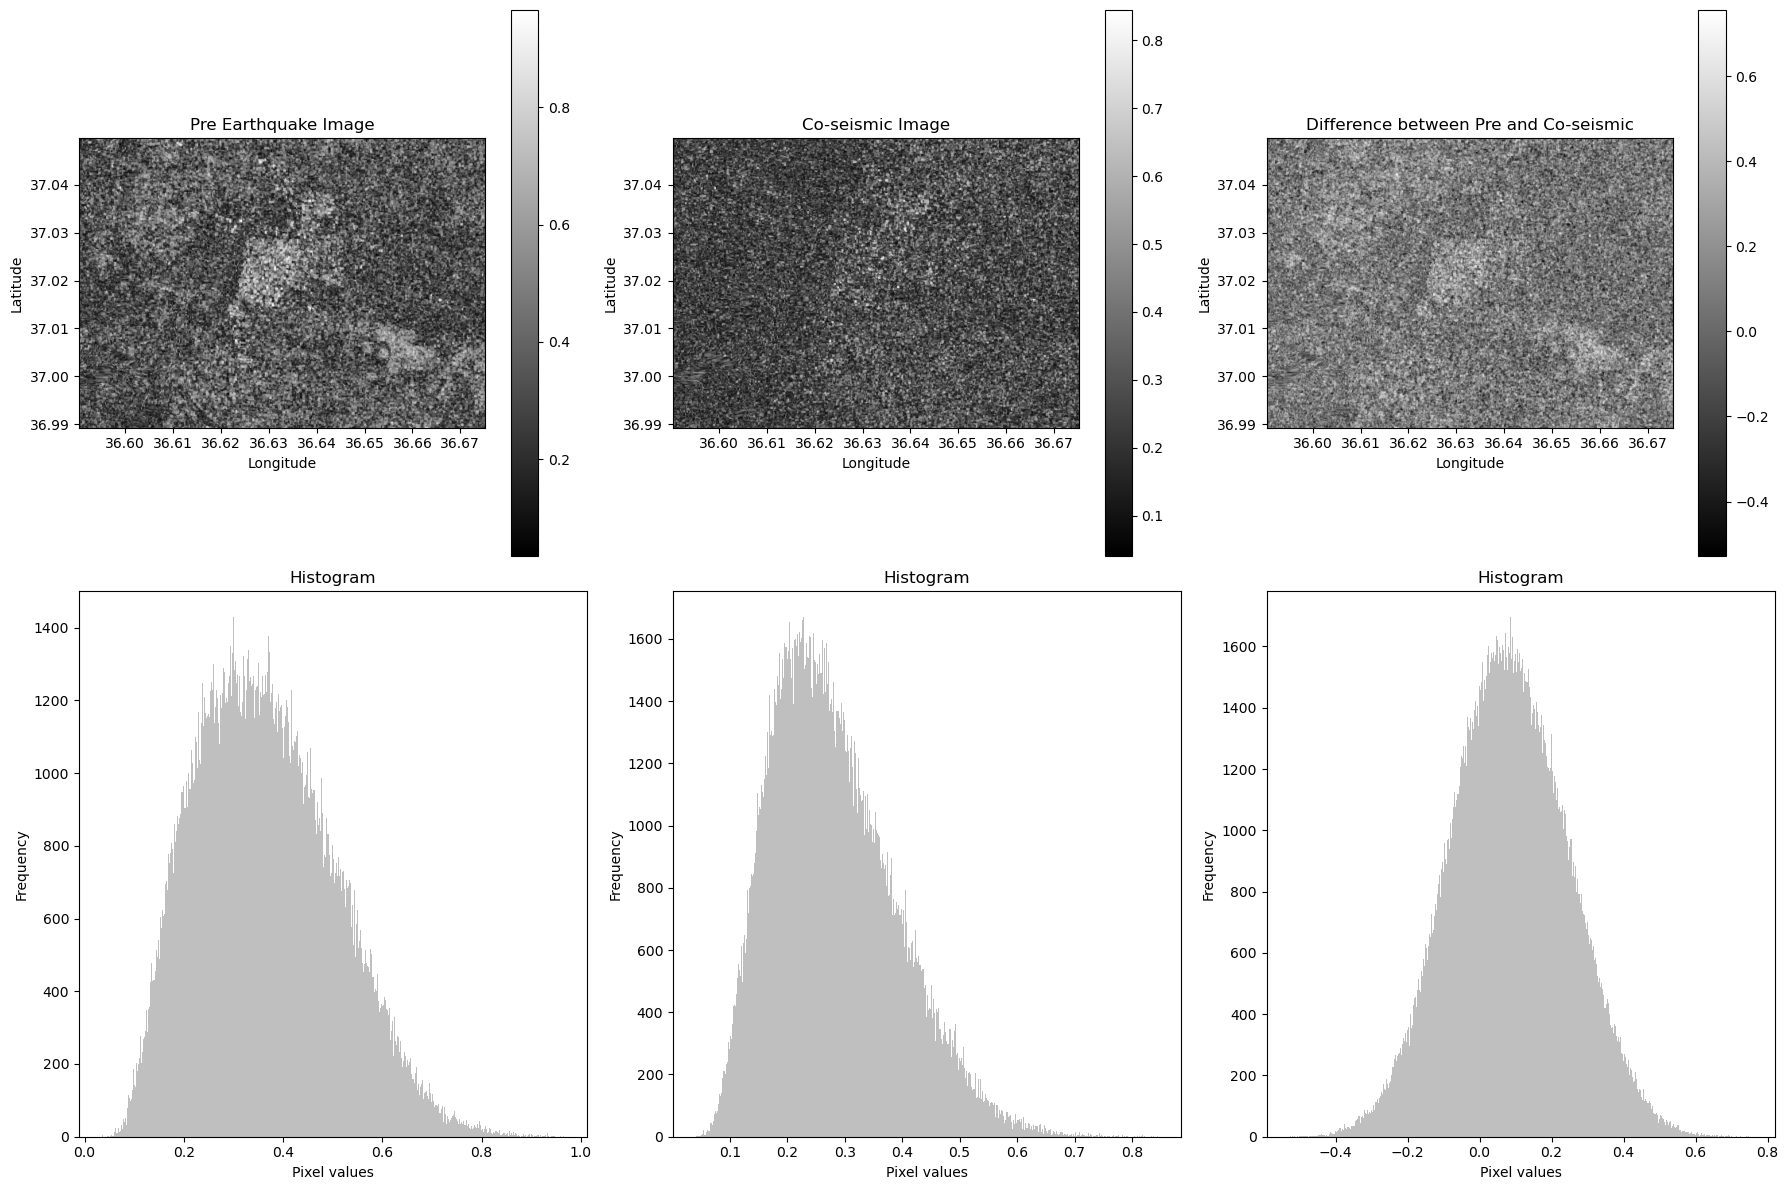

In [17]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to read GeoTIFF file
def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        meta = src.meta  # Copy metadata
    return data, meta

# Function to calculate the logarithmic difference
def calculate_log_difference(data1, data2):
    # Avoid division by zero and log of zero issues
    with np.errstate(divide='ignore', invalid='ignore'):
        log_diff = data1 - data2
    return log_diff

# Function to plot image and histogram
def plot_image_and_histogram(image_data, ax_image, ax_hist, title):
    # Display the image
    show = ax_image.imshow(image_data, cmap='gray', extent=[meta1['transform'][2], meta1['transform'][2] + meta1['transform'][0] * image_data.shape[1],
                                                           meta1['transform'][5] + meta1['transform'][4] * image_data.shape[0], meta1['transform'][5]], origin='upper')
    ax_image.set_title(title)
    ax_image.set_xlabel('Longitude')
    ax_image.set_ylabel('Latitude')
    # Colorbar
    plt.colorbar(show, ax=ax_image, orientation='vertical')

    # Plot histogram
    ax_hist.hist(image_data.ravel(), bins=512, color='gray', alpha=0.5)
    ax_hist.set_title('Histogram')
    ax_hist.set_xlabel('Pixel values')
    ax_hist.set_ylabel('Frequency')

# Load two GeoTIFF images
data1, meta1 = read_geotiff('CHANGE/S1A_20230128T153358__S1A_20230116T153333_20230116T153358_CARD-COH12_crop.tif')
data2, meta2 = read_geotiff('CHANGE/S1A_20230209T153357__S1A_20230128T153333_20230128T153358_CARD-COH12_crop.tif')

# Calculate logarithmic difference
log_diff = calculate_log_difference(data1, data2)

# Save the logarithmic difference as a new GeoTIFF file
output_path = 'log_difference.tif'
meta1.update(dtype=rasterio.float32, count=1, compress='lzw')
with rasterio.open(output_path, 'w', **meta1) as dst:
    dst.write(log_diff.astype(rasterio.float32), 1)

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Plot first image and its histogram
plot_image_and_histogram(data1, ax[0, 0], ax[1, 0], 'Pre Earthquake Image')

# Plot second image and its histogram
plot_image_and_histogram(data2, ax[0, 1], ax[1, 1], 'Co-seismic Image')

# Plot logarithmic difference and its histogram
plot_image_and_histogram(log_diff, ax[0, 2], ax[1, 2], 'Difference between Pre and Co-seismic')

plt.tight_layout()
plt.show()


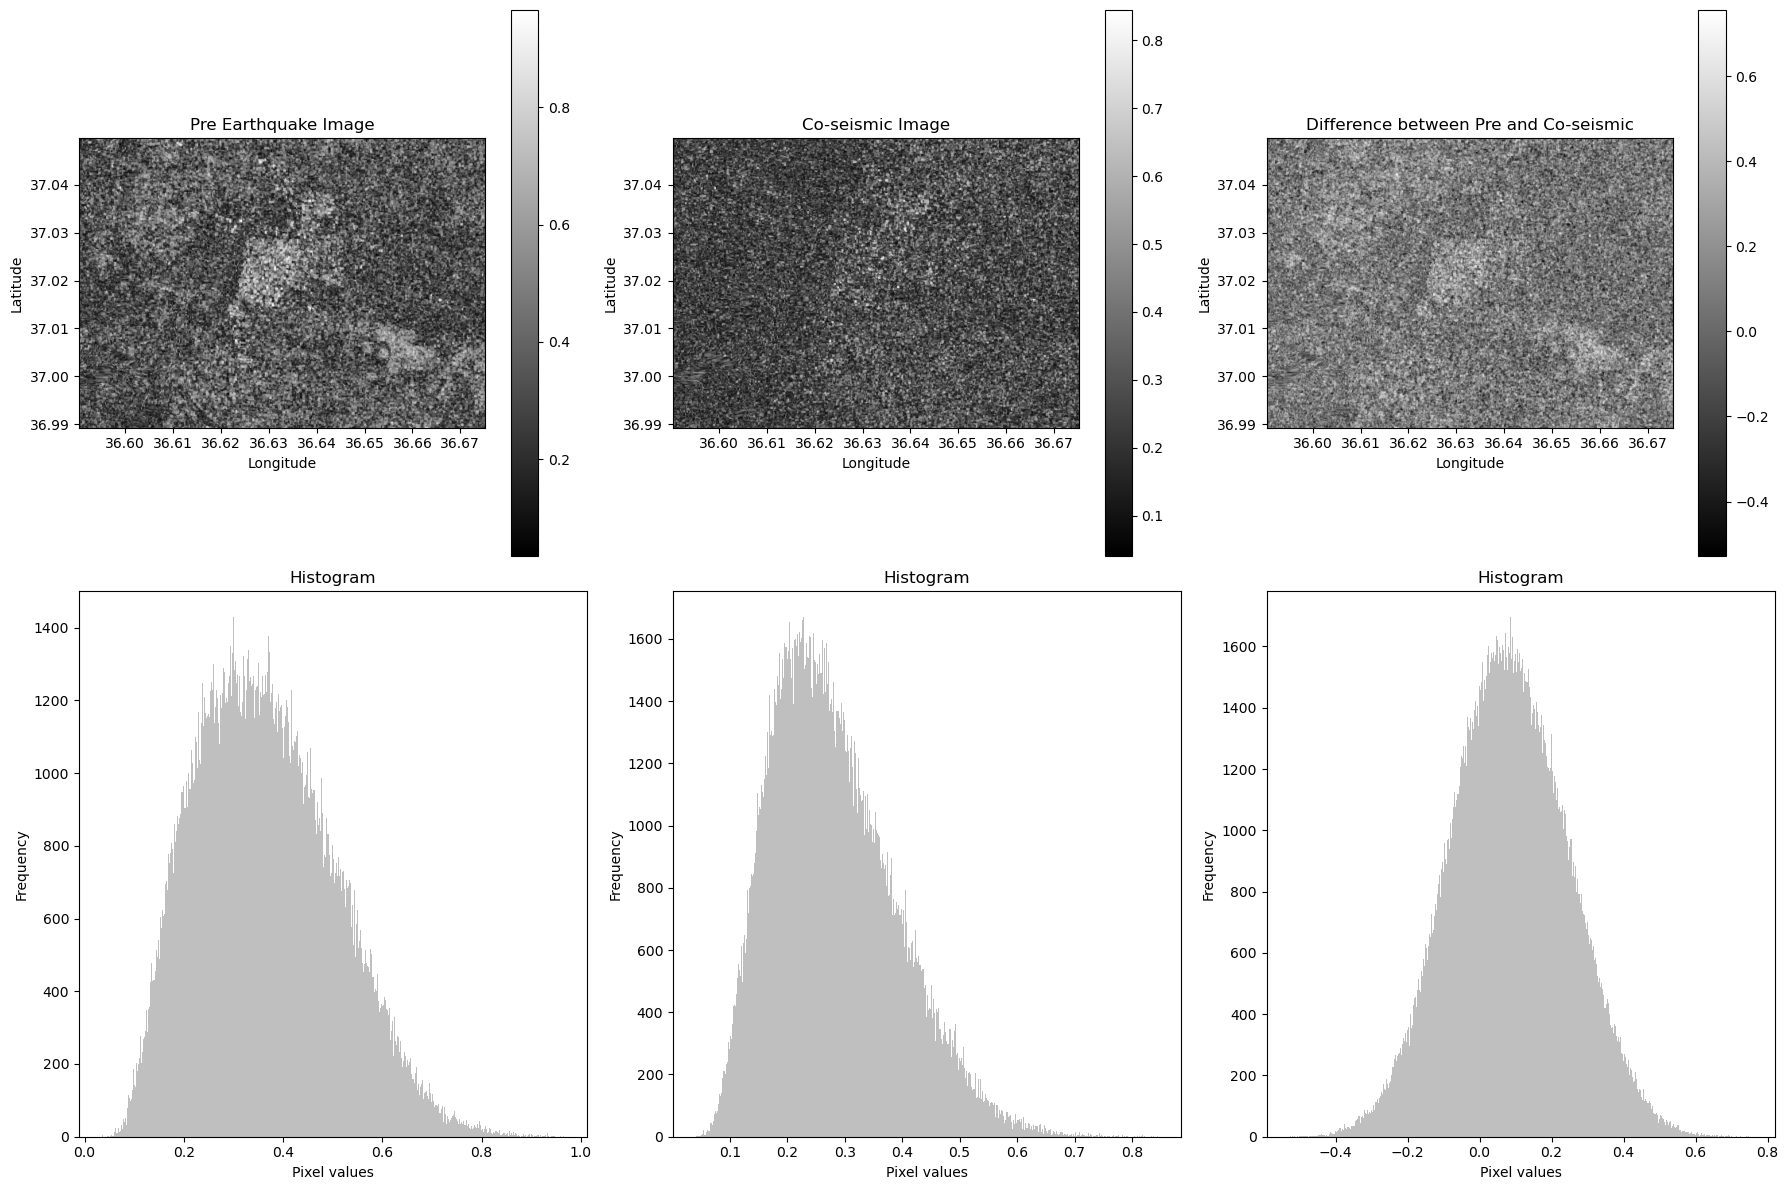

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to read GeoTIFF file
def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        meta = src.meta  # Copy metadata
    return data, meta

# Function to calculate the logarithmic difference
def calculate_log_difference(data1, data2):
    # Avoid division by zero and log of zero issues
    with np.errstate(divide='ignore', invalid='ignore'):
        log_diff = data1 - data2
    return log_diff

# Function to plot image and histogram
def plot_image_and_histogram(image_data, ax_image, ax_hist, title, file_name):
    # Display the image
    show = ax_image.imshow(image_data, cmap='gray', extent=[meta1['transform'][2], meta1['transform'][2] + meta1['transform'][0] * image_data.shape[1],
                                                           meta1['transform'][5] + meta1['transform'][4] * image_data.shape[0], meta1['transform'][5]], origin='upper')
    ax_image.set_title(title)
    ax_image.set_xlabel('Longitude')
    ax_image.set_ylabel('Latitude')
    # Colorbar
    plt.colorbar(show, ax=ax_image, orientation='vertical')

    # Plot histogram
    ax_hist.hist(image_data.ravel(), bins=512, color='gray', alpha=0.5)
    ax_hist.set_title('Histogram')
    ax_hist.set_xlabel('Pixel values')
    ax_hist.set_ylabel('Frequency')

    # Save the figure as JPEG
    plt.savefig(file_name, format='jpeg', dpi=300)

# Load two GeoTIFF images
data1, meta1 = read_geotiff('CHANGE/S1A_20230128T153358__S1A_20230116T153333_20230116T153358_CARD-COH12_crop.tif')
data2, meta2 = read_geotiff('CHANGE/S1A_20230209T153357__S1A_20230128T153333_20230128T153358_CARD-COH12_crop.tif')

# Calculate logarithmic difference
log_diff = calculate_log_difference(data1, data2)

# Save the logarithmic difference as a new GeoTIFF file
output_path = 'log_difference.tif'
meta1.update(dtype=rasterio.float32, count=1, compress='lzw')
with rasterio.open(output_path, 'w', **meta1) as dst:
    dst.write(log_diff.astype(rasterio.float32), 1)

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Plot first image and its histogram
plot_image_and_histogram(data1, ax[0, 0], ax[1, 0], 'Pre Earthquake Image', 'pre_earthquake_image.jpg')

# Plot second image and its histogram
plot_image_and_histogram(data2, ax[0, 1], ax[1, 1], 'Co-seismic Image', 'co_seismic_image.jpg')

# Plot logarithmic difference and its histogram
plot_image_and_histogram(log_diff, ax[0, 2], ax[1, 2], 'Difference between Pre and Co-seismic', 'difference_image.jpg')

plt.tight_layout()
plt.show()


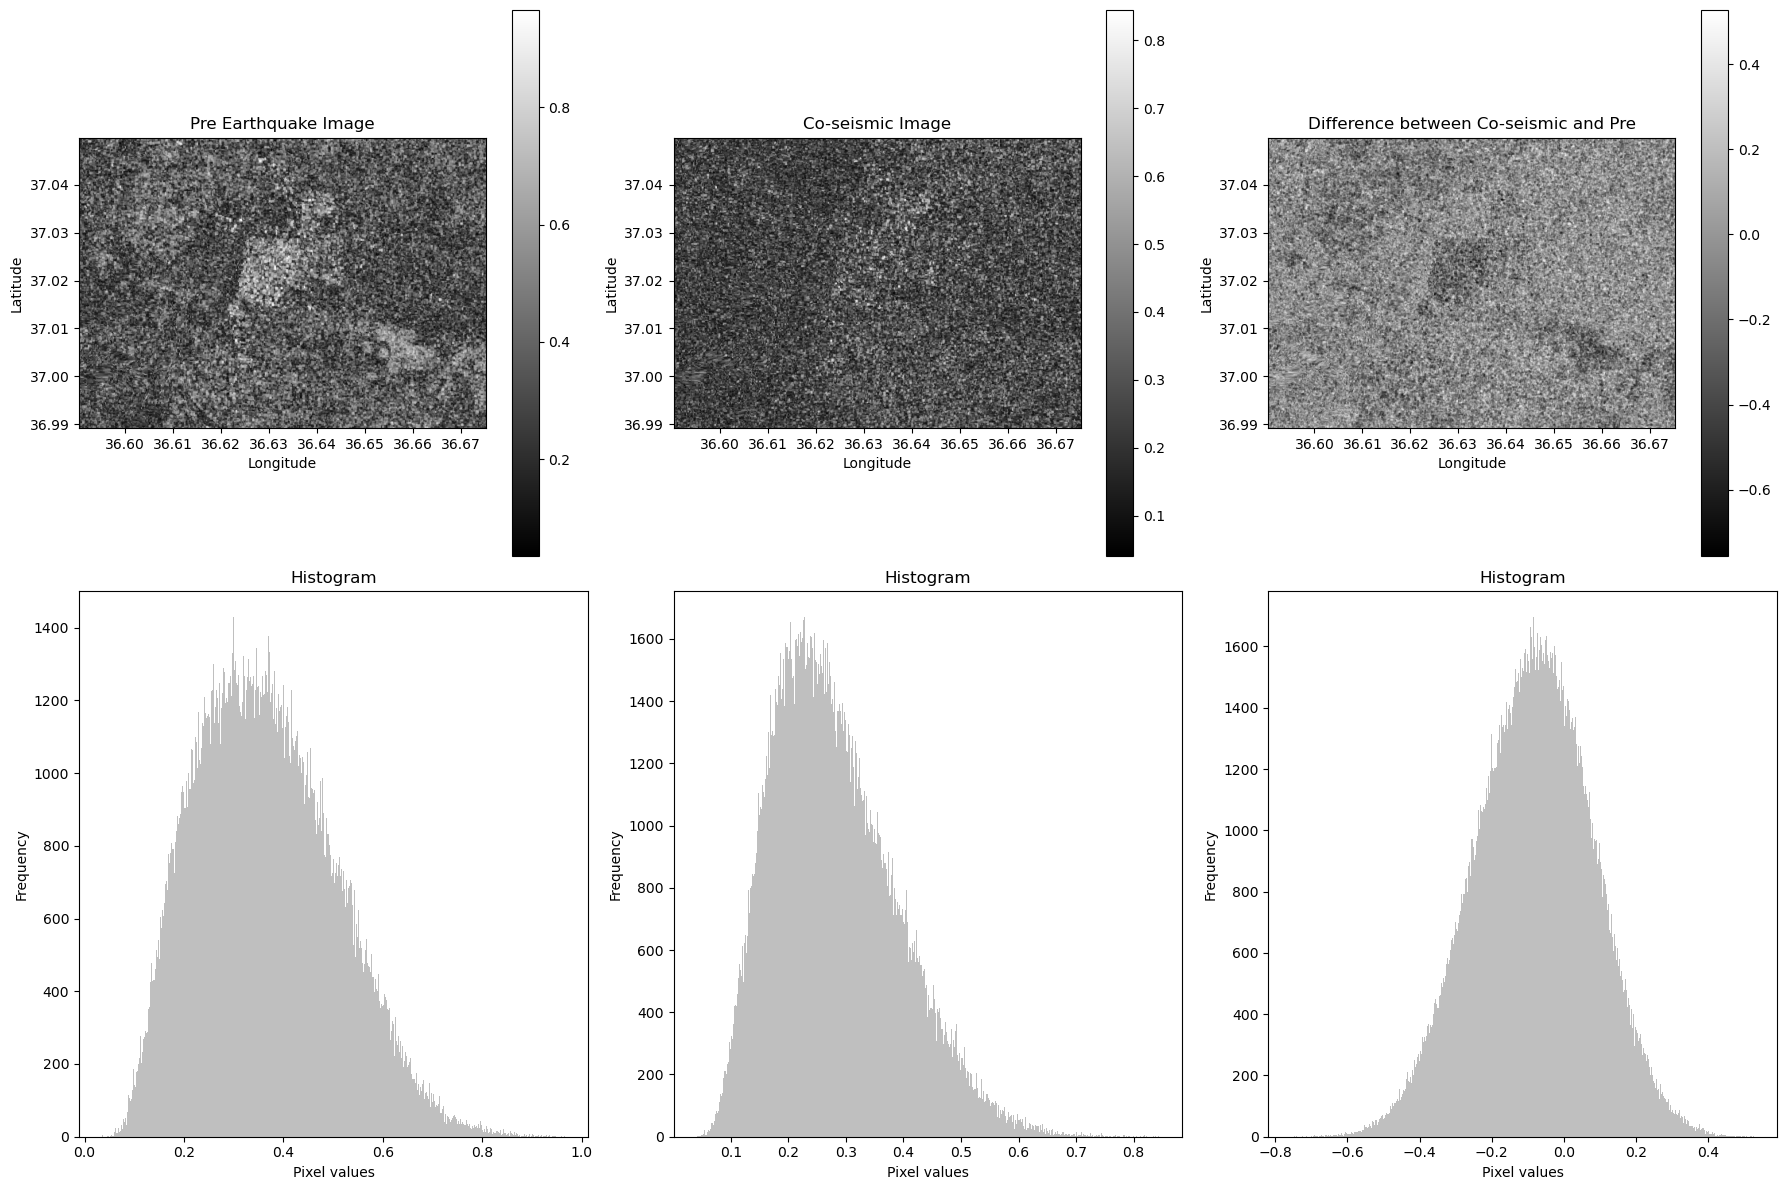

In [24]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to read GeoTIFF file
def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        meta = src.meta  # Copy metadata
    return data, meta

# Function to calculate the logarithmic difference
def calculate_log_difference(data1, data2):
    # Avoid division by zero and log of zero issues
    with np.errstate(divide='ignore', invalid='ignore'):
        log_diff = data2 - data1
    return log_diff

# Function to plot image and histogram
def plot_image_and_histogram(image_data, ax_image, ax_hist, title):
    # Display the image
    show = ax_image.imshow(image_data, cmap='gray', extent=[meta1['transform'][2], meta1['transform'][2] + meta1['transform'][0] * image_data.shape[1],
                                                           meta1['transform'][5] + meta1['transform'][4] * image_data.shape[0], meta1['transform'][5]], origin='upper')
    ax_image.set_title(title)
    ax_image.set_xlabel('Longitude')
    ax_image.set_ylabel('Latitude')
    # Colorbar
    plt.colorbar(show, ax=ax_image, orientation='vertical')

    # Plot histogram
    ax_hist.hist(image_data.ravel(), bins=512, color='gray', alpha=0.5)
    ax_hist.set_title('Histogram')
    ax_hist.set_xlabel('Pixel values')
    ax_hist.set_ylabel('Frequency')

# Load two GeoTIFF images
data1, meta1 = read_geotiff('CHANGE/S1A_20230128T153358__S1A_20230116T153333_20230116T153358_CARD-COH12_crop.tif')
data2, meta2 = read_geotiff('CHANGE/S1A_20230209T153357__S1A_20230128T153333_20230128T153358_CARD-COH12_crop.tif')

# Calculate logarithmic difference
log_diff = calculate_log_difference(data1, data2)

# Save the logarithmic difference as a new GeoTIFF file
output_path = 'difference_map.tif'
meta1.update(dtype=rasterio.float32, count=1, compress='lzw')
with rasterio.open(output_path, 'w', **meta1) as dst:
    dst.write(log_diff.astype(rasterio.float32), 1)

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Plot first image and its histogram
plot_image_and_histogram(data1, ax[0, 0], ax[1, 0], 'Pre Earthquake Image')

# Plot second image and its histogram
plot_image_and_histogram(data2, ax[0, 1], ax[1, 1], 'Co-seismic Image')

# Plot logarithmic difference and its histogram
plot_image_and_histogram(log_diff, ax[0, 2], ax[1, 2], 'Difference between Co-seismic and Pre')

plt.tight_layout()
plt.savefig('full_figure.jpg', format='jpeg', dpi=300, bbox_inches='tight')  # Save the complete figure
plt.show()
